## Unsupervised Learning. Clustering


In [1]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline 

import os
import warnings


warnings.filterwarnings('ignore')

0. Let's rename columns to make proper names

In [2]:
customer_set = pd.read_csv('Mall_Customers.csv')
#print(customer_set.head())
customer_set.rename(columns = {'Annual Income (k$)':'Income','Spending Score (1-100)':'SpendingScore'}, inplace = True)
customer_set

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


1. Let's do standard steps of exploring data

  

In [3]:
customer_set.columns

Index(['CustomerID', 'Gender', 'Age', 'Income', 'SpendingScore'], dtype='object')

In [4]:
customer_set.shape

(200, 5)

In [5]:
customer_set.describe()

,CustomerID,Age,Income,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
print('How much there are NaN values: ')
customer_set.isnull().sum()

How much there are NaN values: 


CustomerID       0
Gender           0
Age              0
Income           0
SpendingScore    0
dtype: int64

## EDA Mall Customers

2. Let's delete CustomerID because it's useless column for our clustering model

In [7]:
customer_set = customer_set.drop('CustomerID',axis=1)
customer_set

,Gender,Age,Income,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


3. Let's explore more our variables with proper visualisations

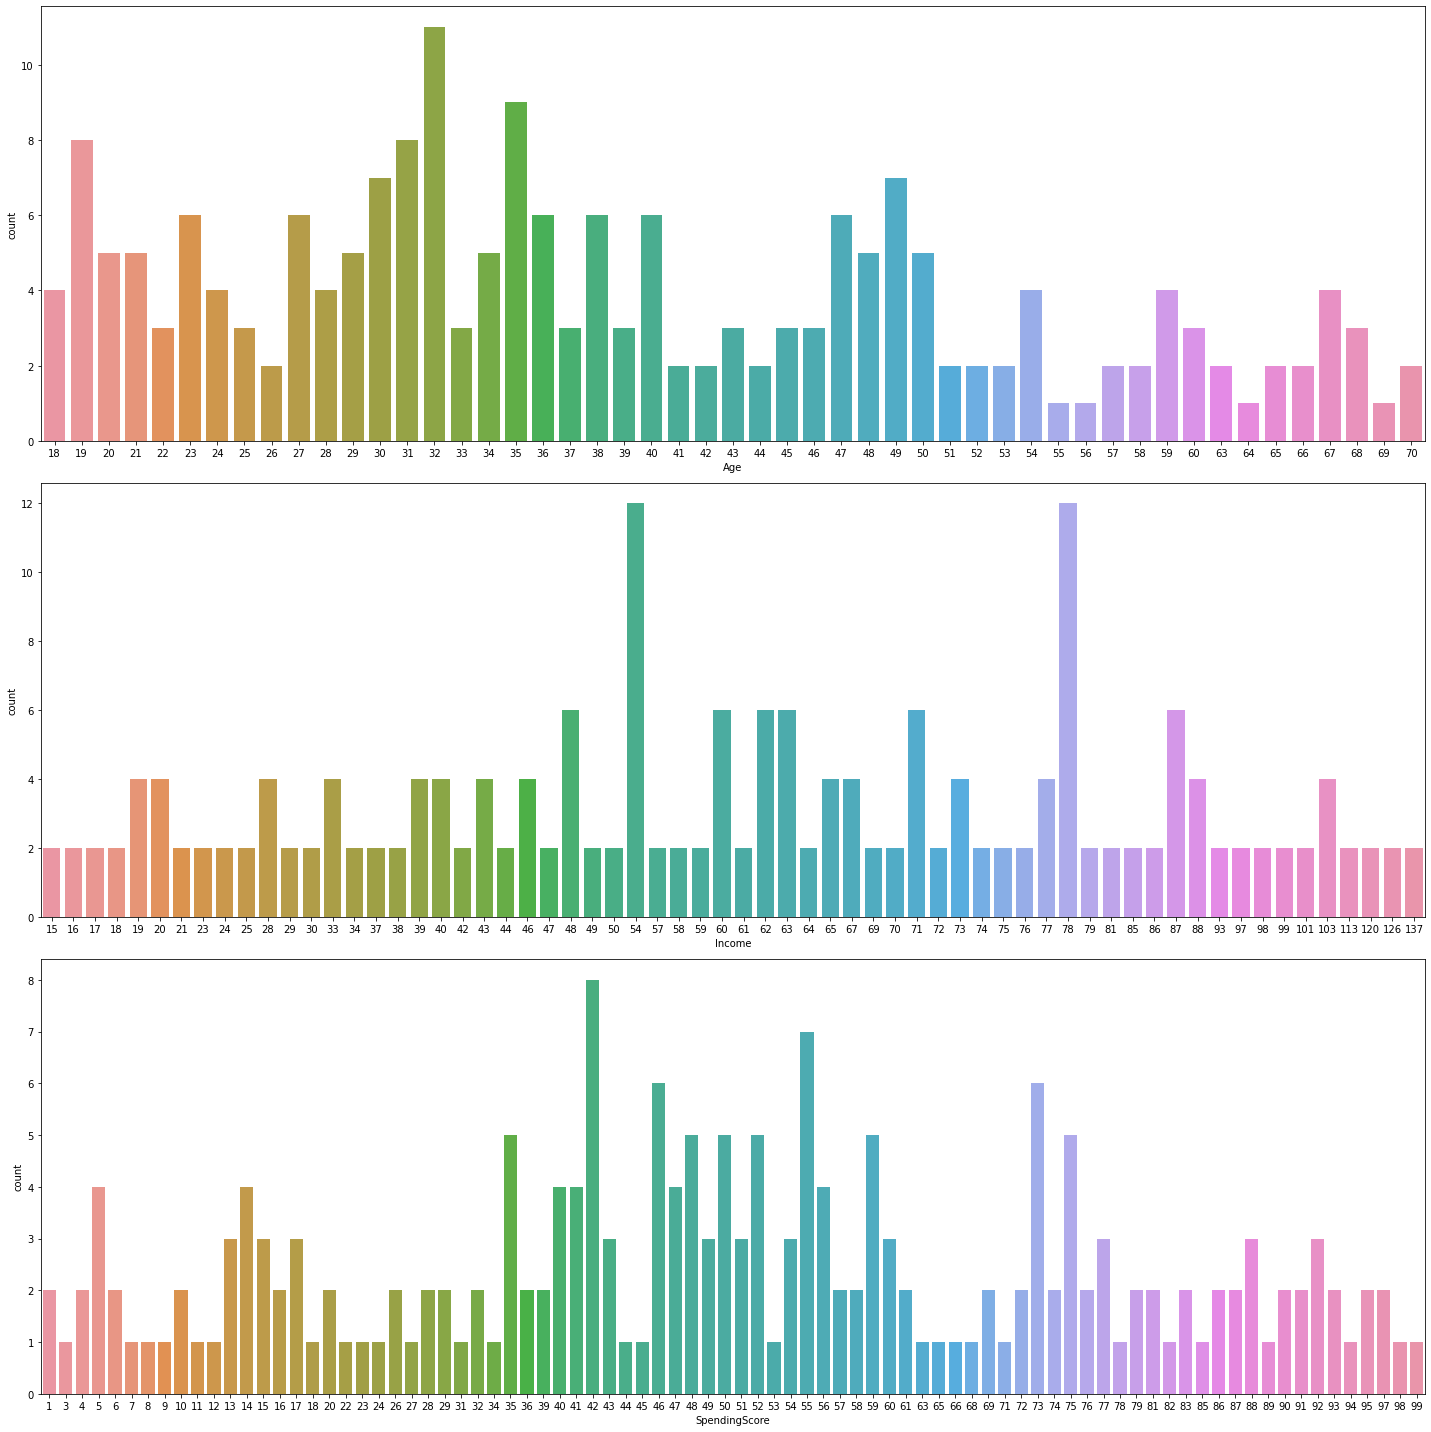

In [8]:
f, ax = plt.subplots(3,1,figsize=(20,20))
sns.countplot(x='Age',data=customer_set,ax=ax[0])
sns.countplot(x='Income',data=customer_set,ax=ax[1])
sns.countplot(x='SpendingScore',data=customer_set,ax=ax[2])
plt.tight_layout()

4. Let's look at these variables `Age`,` Income` and `SpendingScore` in relation to the variable` Gender`.
* Let's construct `pairplot` on all variables concerning variable` Gender`:
 
 

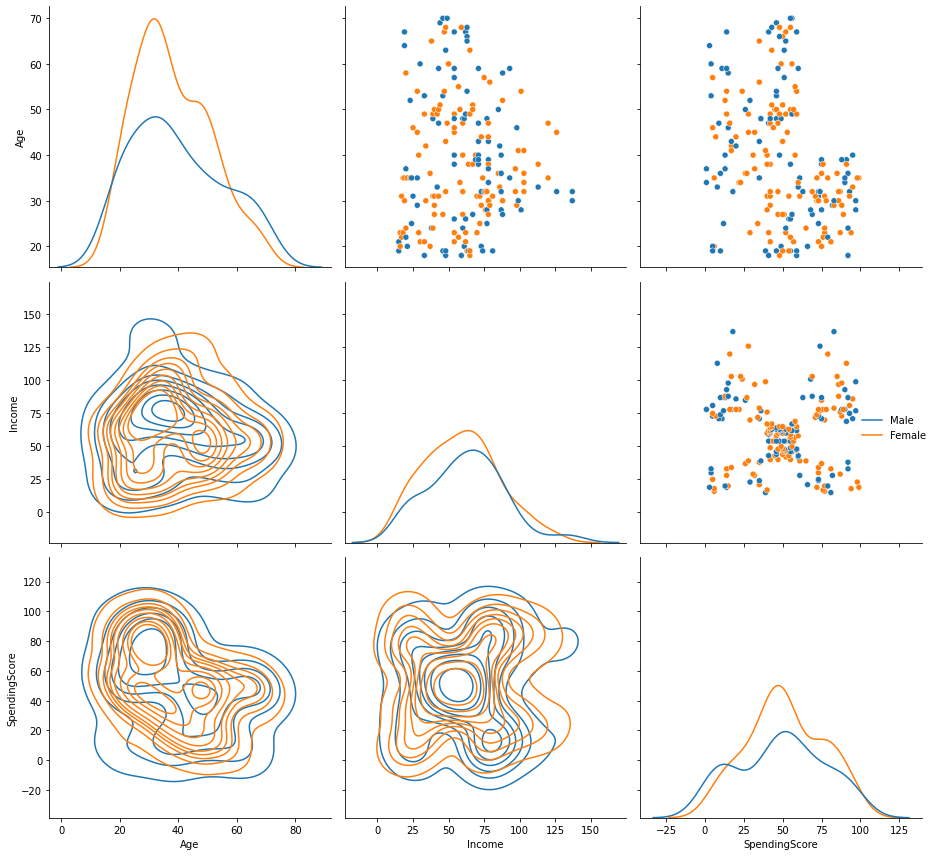

In [9]:
g = sns.PairGrid(customer_set[['Age','Income','SpendingScore','Gender']], hue="Gender",height=4)
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot)
g.map_lower(sns.kdeplot,lw=1)
g.add_legend(title="", adjust_subtitles=True)
plt.tight_layout()

**Висновки з 1-4 завдання (детальні)**

0. By default, downloaded the dataset. Renamed our columns using the .rename () method for better readability plus removed the extra characters in the names of these columns and made them without spaces, now you can access these columns through the point df.Income, because previously it was possible only through [' '] refer to the rows of the column.
1. Conducted a standard check of data before processing, looked at the names of columns, their number, dimension, statistical information, thanks to which we can say that the column CustomerID is not required for clustering, because it does not contain useful information, and checked NaN dataset and saw that there is no nan.
2. Since this column does not contain important information for us, we can get rid of it
3. Visualized our data through countplot, we see a lot of data, we can look at the general trend, maximum, minimum, about some deep conclusions here to say nothing yet.
4. On the density graph we can **see that the variables income and SpendingScore has about 5 extremes**, so in the future we will pay attention to n_clusters = 5

5. Analyze `Gender` column  

Female    112
Male       88
Name: Gender, dtype: int64


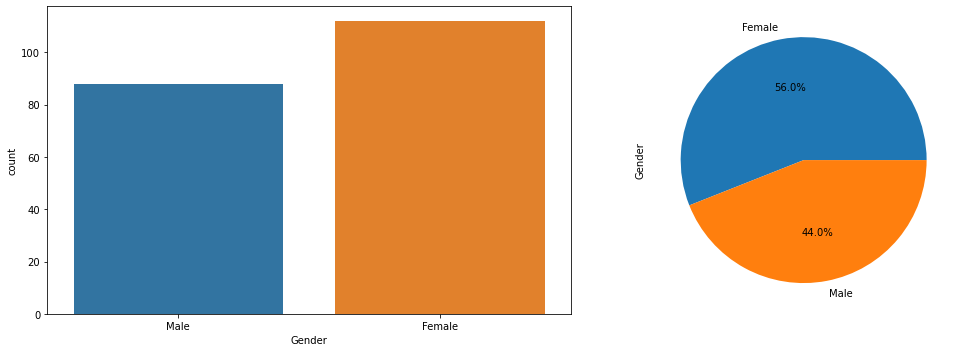

In [10]:
f, ax = plt.subplots(1,2,figsize=(15,5))
print(customer_set.Gender.value_counts())

sns.countplot(x='Gender',data=customer_set,ax=ax[0])

data = customer_set.Gender.value_counts()
data.plot.pie(autopct="%.1f%%")

plt.tight_layout()

6. Build histograms of variables `Age` and` Income` relative to variable `Gender`


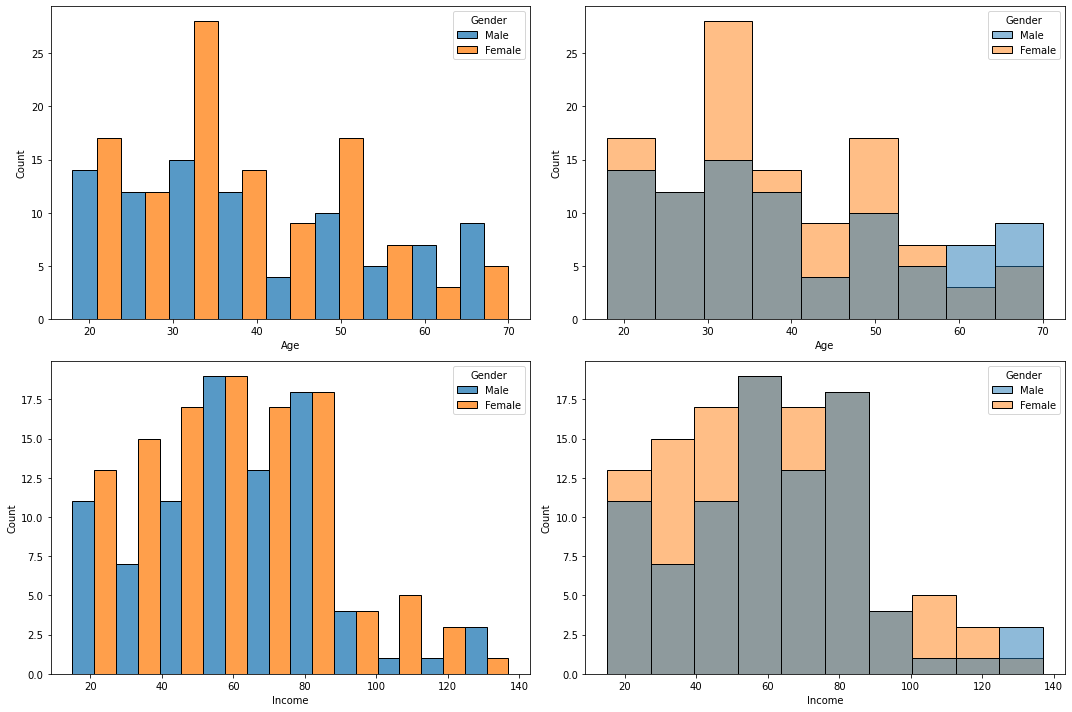

In [11]:
f, ax = plt.subplots(2,2,figsize=(15,10))

sns.histplot(x='Age',data=customer_set,hue='Gender',ax=ax[0,0],multiple='dodge')
sns.histplot(x='Age',data=customer_set,hue='Gender',ax=ax[0,1],multiple='layer')

sns.histplot(x='Income',data=customer_set,hue='Gender',ax=ax[1,0],multiple='dodge')
sns.histplot(x='Income',data=customer_set,hue='Gender',ax=ax[1,1],multiple='layer')
plt.tight_layout()

7. Construct histograms of the variable `SpendingScore` relative to the variable` Gender`

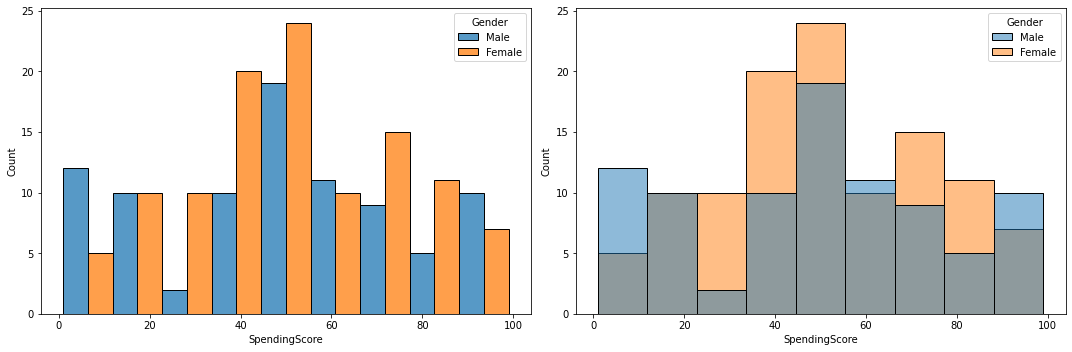

In [12]:
f, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(x='SpendingScore',data=customer_set,hue='Gender',ax=ax[0],multiple='dodge')
sns.histplot(x='SpendingScore',data=customer_set,hue='Gender',ax=ax[1],multiple='layer')
plt.tight_layout()

8. Build a `boxplot` on the variable` SpendingScore` and see how the costs of the variable `Gender` differ.

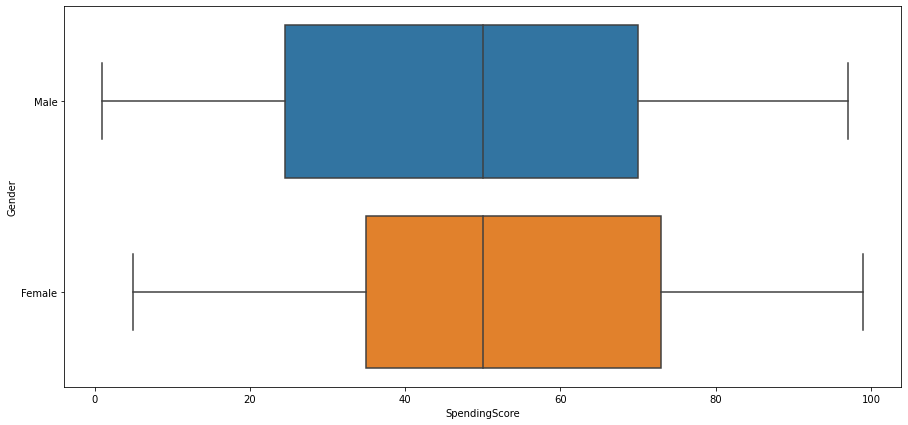

In [13]:
plt.figure(figsize=(15,7))
sns.boxplot(x='SpendingScore',data=customer_set,y='Gender')
plt.show()

9. We will use **Kmeans** and before implementing this model, we will look at optimal number of clusters with **Elbow method**, as you can remeber from PairGrid plot in 4 task, i can suppose that 5 will be a good number of clusters

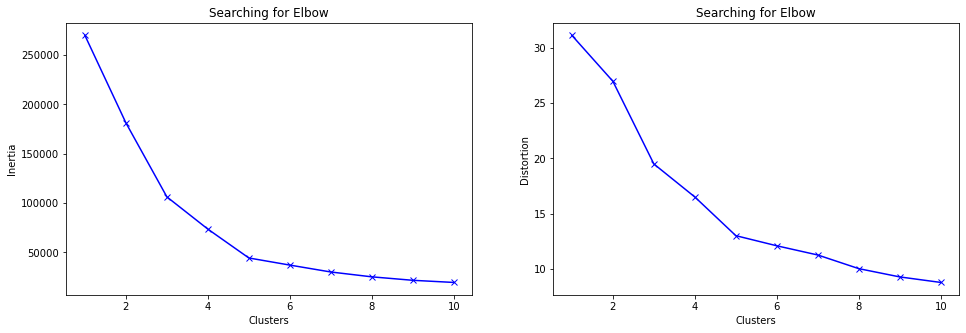

For n_clusters=2, The Silhouette Coefficient is 0.2968969162503008
For n_clusters=3, The Silhouette Coefficient is 0.46761358158775435
For n_clusters=4, The Silhouette Coefficient is 0.4931963109249047
For n_clusters=5, The Silhouette Coefficient is 0.553931997444648
For n_clusters=6, The Silhouette Coefficient is 0.53976103063432
For n_clusters=7, The Silhouette Coefficient is 0.5288104473798049
For n_clusters=8, The Silhouette Coefficient is 0.4581763522413715
For n_clusters=9, The Silhouette Coefficient is 0.45780808918889493
For n_clusters=10, The Silhouette Coefficient is 0.45275118302579015


In [14]:
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from sklearn import metrics

X = customer_set.drop(['Gender'], axis=1)
X = X[['Income','SpendingScore']].copy()
clusters = [*range(1, 11)]

distortions = []
inertias = []
 
for k in clusters:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

f,ax = plt.subplots(1,2,figsize=(16, 5))
ax[0].plot(clusters, inertias, 'bx-')
#sns.lineplot(x=list(K), y=inertias, ax=ax,linestyle='dashdot')
ax[0].set_title('Searching for Elbow')
ax[0].set_xlabel('Clusters')
ax[0].set_ylabel('Inertia')

ax[1].plot(clusters, distortions, 'bx-')
#sns.lineplot(x=list(K), y=inertias, ax=ax,linestyle='dashdot')
ax[1].set_title('Searching for Elbow')
ax[1].set_xlabel('Clusters')
ax[1].set_ylabel('Distortion')

plt.show()


for n_cluster in range(2,11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

## Conclusions

- Using 2 different methods to find the optimal number of clusters and I believe this number is n = 5, which clearly shows us the coefficient of the silhouette with the maximum value of 5, and the method of the elbow criterion on the graph shows that after 5 begins more a smoother decline, when previously it was quite sharp in the same n = 4 n = 2.

- Removed the Gender variable because there are already 2 values, 2 clusters themselves, and we are trying to define clusters of more homogeneous variables as Income and SpendingScore. Well, in my opinion, the values ​​of Income and SpendingScore are more similar and through them we can cluster people into groups for further effective business or something else, because customer segmentation is one of the main goals of business and clustering with the right variables does it perfectly.


10. Let's make some scatter plots

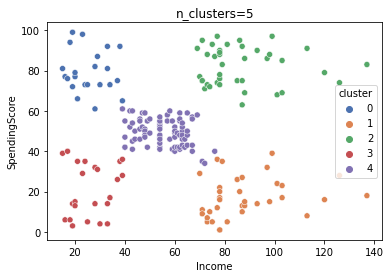

In [15]:
kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(customer_set[['Income','SpendingScore']])
pred = kmeans.predict(customer_set[['Income','SpendingScore']])
n_clusters_5 = pd.DataFrame(customer_set[['Income','SpendingScore']])
n_clusters_5['cluster'] = pred


sns.scatterplot(data=n_clusters_5, x="Income", y="SpendingScore", hue="cluster", palette="deep").set_title("n_clusters=5")

plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(n_clusters_5, x='Income', y='SpendingScore', z='cluster',
              color='cluster')
fig.show()

11. Let's cluster the dataset with [AglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)



In [ ]:
#from sklearn.preprocessing import StandardScaler, normalize
X = X[['Income','SpendingScore']].copy()

for i in [*range(2,9)]:
    for j in ['ward','complete','average','single']:
        algo_cluster = AgglomerativeClustering(n_clusters = i,linkage=j).fit(X)
        plt.figure(figsize =(6, 6))
        sns.scatterplot(x = 'Income', data=X,y='SpendingScore', 
               hue = algo_cluster.fit_predict(X),  palette ='deep').set_title('n_clusters:' + str(i) + '  linkage:' + j)
        plt.show()

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
for i in ['ward','complete','average','single']:
    Z = linkage(X, i)
    fig = plt.figure(figsize=(25, 10))
    dn = dendrogram(Z)
    plt.show()

## Conclusions

- If you look at n_clusters = 5 and n_clusters = 7 on scatterplot, then with the methods linkge = ward, the complete result is the same as in Kmeans, with the next 2 methods of linkage, the schedule changes significantly, especially with single, as for me this method not suitable here, because most clusters contain only 1-3 points and there is 1 cluster that occupies almost all points, more than half of all points, similarly on the dendogram we see a general similarity between ward and complete, when the next two methods are strikingly different in visualizations . At n = 7 the average method has a better view on the graph in contrast to the complete and ward methods, but in general the first 2 methods are the best option for me, although at some n = x they are partially different

13. Finally let's compare these models 

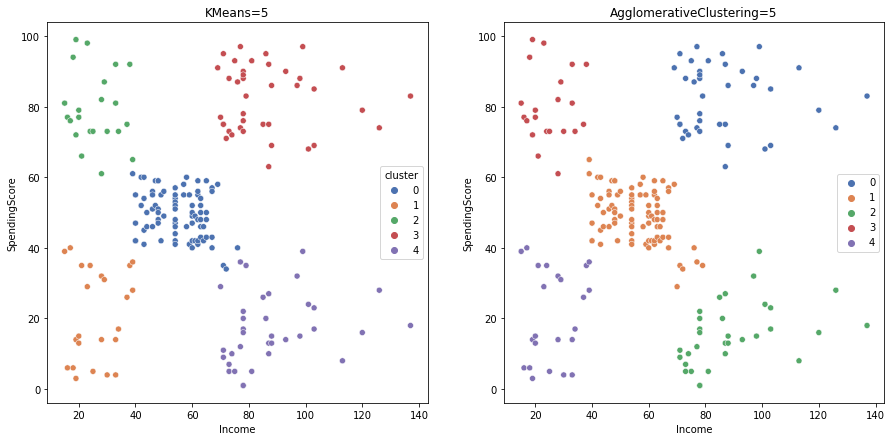

<Figure size 432x432 with 0 Axes>

In [15]:
f, ax = plt.subplots(1,2,figsize=(15,7))

kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(customer_set[['Income','SpendingScore']])
pred = kmeans.predict(customer_set[['Income','SpendingScore']])
n_clusters_5 = pd.DataFrame(customer_set[['Income','SpendingScore']])
n_clusters_5['cluster'] = pred

sns.scatterplot(data=n_clusters_5, x="Income", y="SpendingScore", hue="cluster",ax=ax[0], palette="deep").set_title("KMeans=5")

algo_cluster = AgglomerativeClustering(n_clusters = 5,linkage='complete').fit(X)
plt.figure(figsize =(6, 6))
sns.scatterplot(x = 'Income', data=X, y='SpendingScore', 
               hue = algo_cluster.fit_predict(X),ax=ax[1], palette ='deep').set_title('AgglomerativeClustering=5')
plt.tight_layout()

## Conclusion

13. In my opinion n = 5 is the best option, at increase n >= 8 scatterplot becomes difficult to read because clusters know smaller and it already means that for the given dataset such clustering is superfluous, at n = 5 the best coefficient of silhouette plus on the method of the elbow with inertia (distance) after 5 begins a greater gradual decline in distance between cetroids, which is another plus of clusters. In fact, the graphs are similar, only a few points in them are different, I like both:D maybe **KMeans a little more**, but the number of clusters = 5 is a good choice.